In [228]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [229]:
# read the data set
df = pd.read_excel('/content/dataset.xlsx')
df.head()

,Unnamed: 0,Price,Location,Bedroom,Bathroom,Carport,Land,Building,Month,City/Regency,Latitude,Longitude
0,0,1.600000e+09,Padalarang,2,1.0,1.0,72.0,50.0,8.0,West Bandung Regency,-6.843600,107.478400
1,1,8.500000e+08,Parongpong,2,1.0,1.0,70.0,80.0,8.0,West Bandung Regency,-6.803228,107.581804
2,2,8.750000e+08,Buah Batu,3,2.0,1.0,60.0,70.0,8.0,Bandung City,-6.965549,107.637926
3,3,1.750000e+09,Bojongsoang,2,3.0,1.0,90.0,94.0,8.0,Bandung Regency,-6.993945,107.643700
4,4,4.900000e+09,Bojongloa Kidul,4,4.0,0.0,200.0,300.0,8.0,Bandung City,-6.947036,107.596271


In [230]:
# Drop the index column
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,Price,Location,Bedroom,Bathroom,Carport,Land,Building,Month,City/Regency,Latitude,Longitude
0,1.600000e+09,Padalarang,2,1.0,1.0,72.0,50.0,8.0,West Bandung Regency,-6.843600,107.478400
1,8.500000e+08,Parongpong,2,1.0,1.0,70.0,80.0,8.0,West Bandung Regency,-6.803228,107.581804
2,8.750000e+08,Buah Batu,3,2.0,1.0,60.0,70.0,8.0,Bandung City,-6.965549,107.637926
3,1.750000e+09,Bojongsoang,2,3.0,1.0,90.0,94.0,8.0,Bandung Regency,-6.993945,107.643700
4,4.900000e+09,Bojongloa Kidul,4,4.0,0.0,200.0,300.0,8.0,Bandung City,-6.947036,107.596271


**Exploratory Data Analysis (EDA)**

In [231]:
# understand the shape of data
df.shape

(32536, 11)

In [232]:
# Basic informations about data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32536 entries, 0 to 32535
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         32536 non-null  float64
 1   Location      32527 non-null  object 
 2   Bedroom       32536 non-null  int64  
 3   Bathroom      32521 non-null  float64
 4   Carport       32521 non-null  float64
 5   Land          32533 non-null  float64
 6   Building      32527 non-null  float64
 7   Month         32527 non-null  float64
 8   City/Regency  32527 non-null  object 
 9   Latitude      32526 non-null  float64
 10  Longitude     32527 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 2.7+ MB


In [233]:
# describe the data
df.describe()

,Price,Bedroom,Bathroom,Carport,Land,Building,Month,Latitude,Longitude
count,3.253600e+04,32536.000000,32521.000000,32521.000000,32533.000000,32527.000000,32527.000000,32526.000000,32527.000000
mean,2.554932e+09,3.524158,2.527721,1.052120,181.392002,179.397485,8.988533,-6.923486,107.625922
std,1.879994e+09,1.235943,1.074318,0.796993,107.491313,108.516303,0.821016,0.051064,0.075701
min,1.020000e+07,1.000000,1.000000,0.000000,37.000000,37.000000,8.000000,-7.230321,107.434849
25%,1.200000e+09,3.000000,2.000000,0.000000,105.000000,100.000000,8.000000,-6.952981,107.590747
50%,2.000000e+09,3.000000,2.000000,1.000000,147.000000,150.000000,9.000000,-6.931934,107.626219
75%,3.365000e+09,4.000000,3.000000,2.000000,225.000000,235.000000,10.000000,-6.886334,107.659881
max,9.700000e+09,8.000000,7.000000,3.000000,612.000000,585.000000,10.000000,-6.734761,107.886580


In [234]:
# checking for null values
df.isnull().sum()

,0
Price,0
Location,9
Bedroom,0
Bathroom,15
Carport,15
Land,3
Building,9
Month,9
City/Regency,9
Latitude,10


In [235]:
# As the null values present in very smaller amount as compared to data set
# So drop the null value
df.dropna(inplace=True)
df.isnull().sum()

,0
Price,0
Location,0
Bedroom,0
Bathroom,0
Carport,0
Land,0
Building,0
Month,0
City/Regency,0
Latitude,0


In [236]:
# check the shape of da set again
df.shape

(32481, 11)

<Axes: >

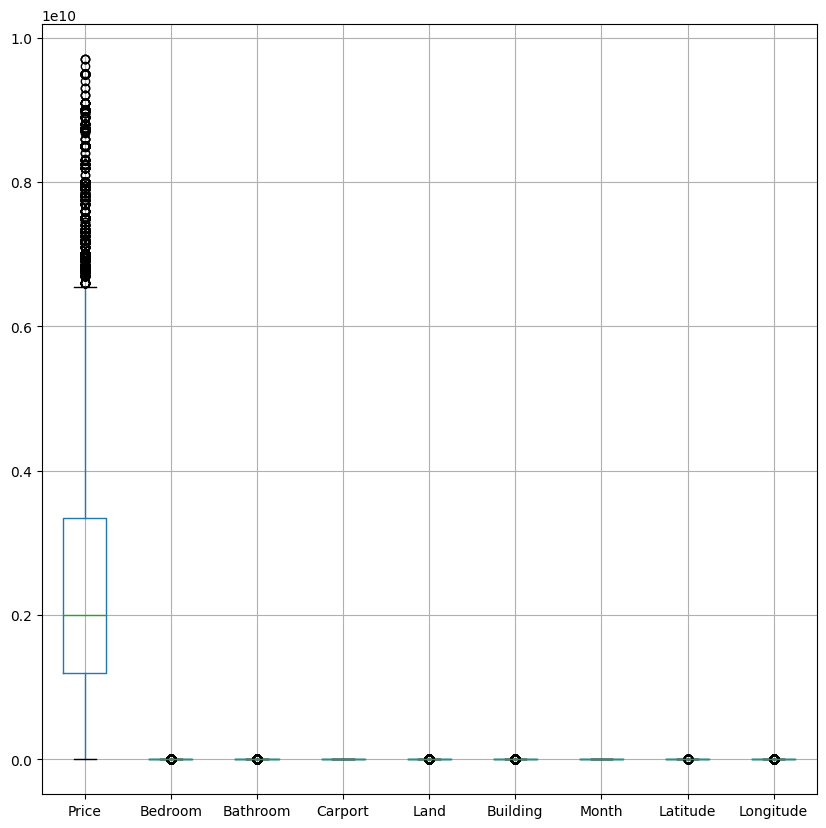

In [237]:
# boxplot to visualize outliers
df.boxplot(figsize=(10,10))

In [238]:
# check unique value
df['Bathroom'].unique()

array([1., 2., 3., 4., 6., 5., 7.])

In [239]:
# check unique value
df['Bedroom'].unique()

array([2, 3, 4, 5, 6, 8, 7, 1])

# *The outliers shown in boxplot may not be the actual outliers *

**Key Drivers of Price**

<Axes: >

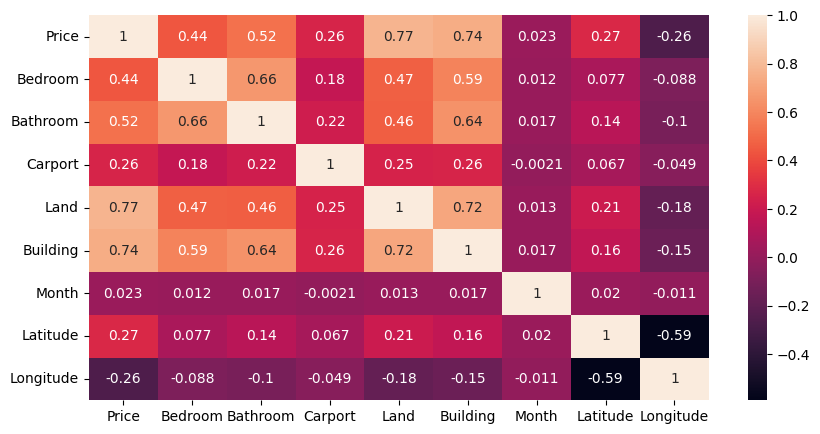

In [240]:
#plot correlation matrix
corr = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True)

**The price is highly correlated with the Land and Building, Bedroom and bathroom are also highly correlated with price.**

**Drop unnecessary column (Location)**

In [241]:
df.drop(['Location'], axis=1, inplace=True)

In [242]:
# unique values of City/Regency
df['City/Regency'].unique()

array(['West Bandung Regency', 'Bandung City', 'Bandung Regency'],
      dtype=object)

**Location Analysis**

In [243]:
# mean price based on city/Regency
df.groupby('City/Regency')['Price'].mean()

,Price
City/Regency,
Bandung City,2.702798e+09
Bandung Regency,1.424884e+09
West Bandung Regency,3.187378e+09


In [244]:
# mean Carport based on city/Regency
df.groupby('City/Regency')['Carport'].mean()

,Carport
City/Regency,
Bandung City,1.109020
Bandung Regency,0.851458
West Bandung Regency,0.947920


In [245]:
# mean Building based on city/Regency
df.groupby('City/Regency')['Building'].mean()

,Building
City/Regency,
Bandung City,191.086866
Bandung Regency,130.280930
West Bandung Regency,170.234798


**By analysing above data Bandung Regency is better and suggested**

In [246]:
# check value count for City/Regency
df['City/Regency'].value_counts(normalize=True)

,proportion
City/Regency,
Bandung City,0.737908
Bandung Regency,0.156276
West Bandung Regency,0.105816


In [247]:
# Drop the columns Latitude and Longitude
df.drop(['Latitude','Longitude'], axis=1, inplace=True)
df.head()

,Price,Bedroom,Bathroom,Carport,Land,Building,Month,City/Regency
0,1.600000e+09,2,1.0,1.0,72.0,50.0,8.0,West Bandung Regency
1,8.500000e+08,2,1.0,1.0,70.0,80.0,8.0,West Bandung Regency
2,8.750000e+08,3,2.0,1.0,60.0,70.0,8.0,Bandung City
3,1.750000e+09,2,3.0,1.0,90.0,94.0,8.0,Bandung Regency
4,4.900000e+09,4,4.0,0.0,200.0,300.0,8.0,Bandung City


In [248]:
# scaling the numerical columns using standard scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df[['Bedroom','Bathroom','Carport','Land','Building','Month']] = sc.fit_transform(df[['Bedroom','Bathroom','Carport','Land','Building','Month']])
df.head()

,Price,Bedroom,Bathroom,Carport,Land,Building,Month,City/Regency
0,1.600000e+09,-1.233232,-1.421826,-0.064898,-1.017662,-1.192436,-1.206145,West Bandung Regency
1,8.500000e+08,-1.233232,-1.421826,-0.064898,-1.036263,-0.915935,-1.206145,West Bandung Regency
2,8.750000e+08,-0.424155,-0.491068,-0.064898,-1.129268,-1.008102,-1.206145,Bandung City
3,1.750000e+09,-1.233232,0.439689,-0.064898,-0.850253,-0.786902,-1.206145,Bandung Regency
4,4.900000e+09,0.384923,1.370447,-1.319637,0.172801,1.111737,-1.206145,Bandung City


In [249]:
# Encoding the column City/Regency
df = pd.get_dummies(df, columns=['City/Regency'],dtype= int)
df.head()

,Price,Bedroom,Bathroom,Carport,Land,Building,Month,City/Regency_Bandung City,City/Regency_Bandung Regency,City/Regency_West Bandung Regency
0,1.600000e+09,-1.233232,-1.421826,-0.064898,-1.017662,-1.192436,-1.206145,0,0,1
1,8.500000e+08,-1.233232,-1.421826,-0.064898,-1.036263,-0.915935,-1.206145,0,0,1
2,8.750000e+08,-0.424155,-0.491068,-0.064898,-1.129268,-1.008102,-1.206145,1,0,0
3,1.750000e+09,-1.233232,0.439689,-0.064898,-0.850253,-0.786902,-1.206145,0,1,0
4,4.900000e+09,0.384923,1.370447,-1.319637,0.172801,1.111737,-1.206145,1,0,0


In [250]:
# Define Target and feature variables
x = df.drop(['Price'], axis=1)
y = df['Price']

In [251]:
# do train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

**Linear Model**

In [252]:
# Do linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

In [253]:
# Evaluate the model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
mean_squared_error(y_test, y_pred)


1.0020361947460177e+18

In [254]:
mean_absolute_error(y_test, y_pred)

701073623.9551439

In [255]:
r2_score(y_test, y_pred)

0.7097338609618276

**LASSO MODEL**

In [256]:
# Do the Lasso model and evaluate the performence
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(x_train, y_train)

y_pred_lo = lasso.predict(x_test)

In [257]:
mean_squared_error(y_test, y_pred_lo)

1.0020361948285306e+18

In [258]:
mean_absolute_error(y_test, y_pred_lo)

701073624.0346694

In [259]:
r2_score(y_test, y_pred_lo)

0.7097338609379256

**Ridge Model**

In [260]:
# Do the Ridge model and evaluate the performence
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(x_train, y_train)

y_pred_ri = ridge.predict(x_test)

In [261]:
mean_squared_error(y_test, y_pred_ri)

1.0020363289223112e+18

In [262]:
mean_absolute_error(y_test, y_pred_ri)

701074236.0968311

In [263]:
r2_score(y_test, y_pred_ri)

0.7097338220941352

**By comparing all models it is found Linear Regression model is beeter with lower mean absalute error.**

**Predict using best model**

In [264]:
# check the sample prediction
check = [2,1.0,1.0,72.0,50.0,8.0,0,0,1]
predict = lr.predict([check])
predict

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1.01655432e+11])

By analysing the data,   

**Key Drivers of Price:** The price is highly correlated with the Land and Building, Bedroom and bathroom are also highly correlated with price.

**Location Analysis & Property Recommendations :** By analysing data Bandung Regency is better and suggested